In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch
import math
from torch.autograd import Variable
import torch.nn as nn
import pandas as pd

Index(['Tr', 'pr', 'rhor', 'Z', 'alpha', 'thetap', 'kappa', 'Temperature (K)',
       'Pressure (MPa)', 'Density (kg/m3)', 'Volume (m3/kg)',
       'Internal Energy (kJ/kg)', 'Enthalpy (kJ/kg)', 'Entropy (J/gK)',
       'Cv (J/gK)', 'Cp (J/gK)', 'Sound Spd. (m/s)', 'Joule-Thomson (K/MPa)',
       'Viscosity (Pas)', 'Therm. Cond. (W/mK)', 'Phase'],
      dtype='object')


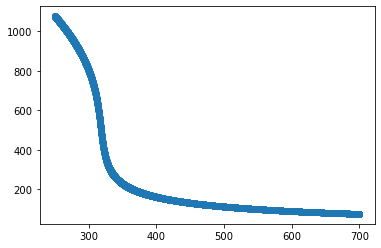

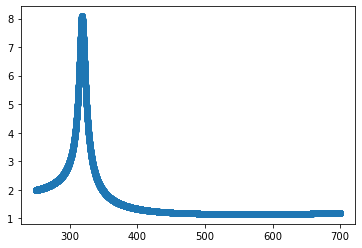

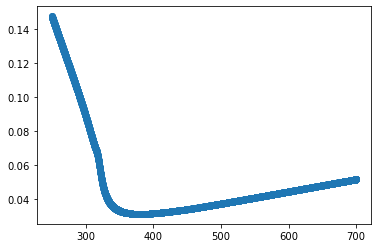

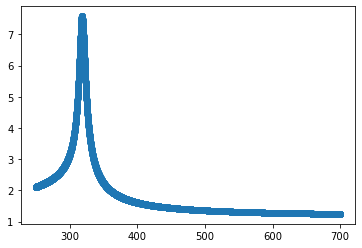

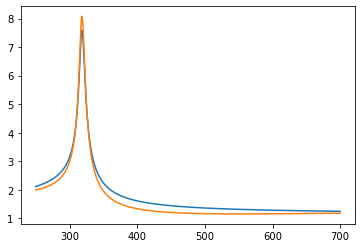

In [2]:

filename = 'CO2_10MPa.dat'
CO2 = pd.read_csv(filename,sep='\t')

print(CO2.columns)

CO2['TT']  = CO2['Temperature (K)']
CO2['cp']  = CO2['Cp (J/gK)']
CO2['cv']  = CO2['Cv (J/gK)']
CO2['rho'] = CO2['Density (kg/m3)']
CO2['mu']  = CO2['Viscosity (Pas)']
CO2['k']   = CO2['Therm. Cond. (W/mK)']
CO2['gamma'] = CO2.cp/CO2.cv

nist = CO2.copy() 


plt.scatter(nist.TT,nist.rho)
plt.show()

plt.scatter(nist.TT,nist.cp)
plt.show()

plt.scatter(nist.TT,nist.k)
plt.show()

plt.scatter(nist.TT,nist.gamma)
plt.show()

plt.plot(nist.TT,nist.gamma)
plt.plot(nist.TT,nist.cp)
plt.show()




In [3]:
print(nist.TT.size)

4500


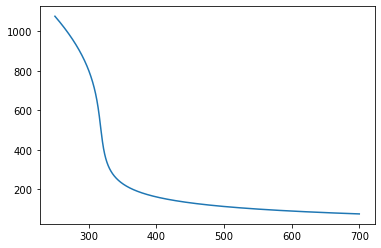

4500
Min  250.0
Max  699.9


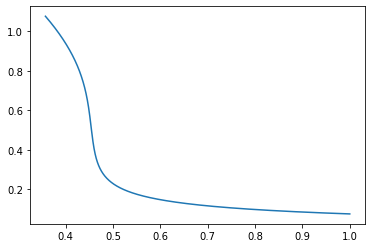

In [4]:
# print(nist.columns)
# Tmax = 4000.


# df = pd.DataFrame((nist.TT, nist.cp),)
# df = nist[['TT','cp','h']].copy()
lll = nist[['TT','rho']].copy()


# trange = np.linspace(nist.TT.max(),Tmax,300)


    
# print(lll)
# print nist[4].item


plt.plot(lll.TT,lll.rho)
plt.show()

print(lll.TT.size)
NSAMPLE = lll.TT.size
x_data = lll.TT
y_data = lll.rho

print('Min ',x_data.min())
print('Max ',x_data.max())

# min-max scaling for ANN performance
x_scale = x_data / 700 #(x_data-x_data.min())/(x_data.max()-x_data.min())
y_scale = y_data / 1000. #(y_data-y_data.min())/(y_data.max()-y_data.min())

plt.plot(x_scale,y_scale)
plt.show()



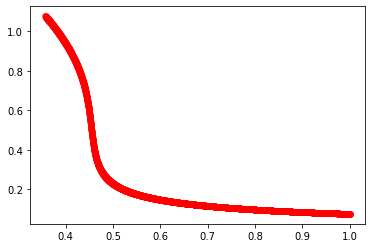

In [5]:
# plt.figure(figsize=(8, 8))
plot_out = plt.plot(x_scale,y_scale,'ro',alpha=0.3)
plt.show()

In [6]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
# from (https://github.com/jcjohnson/pytorch-examples)
N, D_in, H, D_out = NSAMPLE, 1, 3, 1

In [7]:
# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
# since NSAMPLE is not large, we train entire dataset in one minibatch.
x = Variable(torch.from_numpy(x_scale.values.reshape(NSAMPLE, D_in)))
y = Variable(torch.from_numpy(y_scale.values.reshape(NSAMPLE, D_out)), requires_grad=False)

In [8]:
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
#           torch.nn.CELU(D_in, H),
#           torch.nn.Tanh(),
#           torch.nn.CELU(),
#           torch.nn.Linear(H, H),
          torch.nn.Tanh(),
#           torch.nn.LogSigmoid(),
#           torch.nn.CELU(),
#           torch.nn.Sigmoid(),
#           torch.nn.Sigmoid(),
#           torch.nn.Softplus(),
          torch.nn.Linear(H, D_out),
        )

In [9]:
loss_fn = torch.nn.MSELoss()

In [10]:
learning_rate = 0.00001
# optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, alpha=0.8)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
for t in range(10000000):
  y_pred = model(x.float())
  loss = loss_fn(y_pred, y.float())
  if (t % 5000 == 0):
    print(t, loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

0 tensor(0.4280)
5000 tensor(0.0710)
10000 tensor(0.0364)
15000 tensor(0.0241)
20000 tensor(0.0166)
25000 tensor(0.0093)
30000 tensor(0.0051)
35000 tensor(0.0039)
40000 tensor(0.0033)
45000 tensor(0.0031)
50000 tensor(0.0029)
55000 tensor(0.0027)
60000 tensor(0.0024)
65000 tensor(0.0022)
70000 tensor(0.0020)
75000 tensor(0.0018)
80000 tensor(0.0016)
85000 tensor(0.0014)
90000 tensor(0.0013)
95000 tensor(0.0012)
100000 tensor(0.0011)
105000 tensor(0.0011)
110000 tensor(0.0010)
115000 tensor(0.0010)
120000 tensor(0.0010)
125000 tensor(0.0008)
130000 tensor(0.0005)
135000 tensor(0.0005)
140000 tensor(0.0004)
145000 tensor(0.0004)
150000 tensor(0.0004)
155000 tensor(0.0003)
160000 tensor(0.0003)
165000 tensor(0.0003)
170000 tensor(0.0003)
175000 tensor(0.0002)
180000 tensor(0.0002)
185000 tensor(0.0002)
190000 tensor(0.0002)
195000 tensor(0.0002)
200000 tensor(0.0002)
205000 tensor(0.0002)
210000 tensor(0.0002)
215000 tensor(0.0002)
220000 tensor(0.0002)
225000 tensor(0.0002)
230000 tensor

KeyboardInterrupt: 

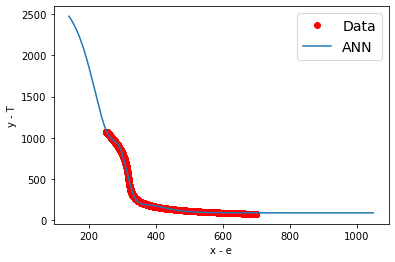

[300.]
tensor([[0.0886]], grad_fn=<AddmmBackward0>)


In [11]:

# plt.title('Thermodynamic mixing trajectory')
plt.xlabel('x - e')
plt.ylabel('y - T')
matplotlib.rcParams.update({'font.size':14})

# x_test = np.float32(np.linspace(300.,600.,NSAMPLE)).T
x_test = np.float32(np.linspace(0.2,1.5,NSAMPLE)).T

# plt.ylim(-15,10)

x_test = Variable(torch.from_numpy(x_test.reshape(NSAMPLE, D_in)))
y_test = model(x_test)


T = np.arange(200.,100.,10.)


# plt.plot(T,shomateCp(T))
# plt.plot(T,shomateCpHi(T))
plt.plot(x_scale*700.,y_scale*1000.,'ro',label='Data')
plt.plot(x_test.data.numpy()*700.,y_test.data.numpy()*1000.,label='ANN')
plt.scatter(nist.TT,nist.rho)
plt.legend()
# plt.xlim(0,4500)
# plt.ylim(0,7)
plt.savefig('discontinuity.pdf')
plt.show()

x_query = np.float32(np.linspace(300,1500,1)).T
print(x_query)
x_query = Variable(torch.from_numpy(x_query.reshape(1, D_in)))

print(model(x_query))

In [75]:
torch.save(model.state_dict(), 'density10MPa.ml')
# model.load_state_dict(torch.load('density.ml'))
# model.eval()

In [76]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

0.weight tensor([[80.0760],
        [-6.3939],
        [ 6.5827]])
0.bias tensor([-35.8988,   2.9783,  -3.1235])
2.weight tensor([[-0.2179,  6.1956,  5.6670]])
2.bias tensor([0.8205])


In [89]:
import time


x_query = np.float32(np.linspace(300,1500,1)).T
print(x_query)
x_query = Variable(torch.from_numpy(x_query.reshape(1, D_in)))

print(model(x_query))

print('ANN: ')
start = time.time()
for i in range(1,10000):
    model(x_query)
#     print model(x_query)
end = time.time()
print(end - start)



print('Shomate: ')
start = time.time()
for i in range(1,10000):
    getCp(1600.)
#     print shomateCp(300.)
end = time.time()
print(end - start)

# start = time.time()
# for i in range(1,10000):
#     shomateH(300.)
# end = time.time()
# print(end - start)


# start = time.time()
# for i in range(1,10000):
#     shomateH(300.)
# end = time.time()
# print(end - start)


[300.]
tensor([[0.7826]], grad_fn=<AddmmBackward>)
ANN: 
0.5201289653778076
Shomate: 
0.0055999755859375
